# 18.369 pset 5 solutions

In [1]:
# import a useful set of modules
from matplotlib import pyplot as plt
import numpy as np
import math
import meep as mp
from meep import mpb

## Problem 2

See the solutions for the computation of the Brillouin zone for this lattice, which we implement as follows:

In [10]:
θ = np.radians(75) # angle (radians) between lattice vectors

α = (np.sin(θ/2) / np.sin(θ))**2 # trig factor from solutions

ms = mpb.ModeSolver(
        resolution=32,
        num_bands=8,
    
        # a hexagonal/triangular lattice:
        geometry_lattice=mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1, 0),
                              basis2=mp.Vector3(np.cos(θ), np.sin(θ))),
        
        # cylindrical rods with radius 0.2a and epsilon=12
        geometry=[mp.Cylinder(0.2, material=mp.Medium(epsilon=12))],
    
        # the corners of the irreducible Brillouin zone (see pset 5 solutions)
        # are Gamma, M, K, and J, as given below in the reciprocal basis.
        k_points = mp.interpolate(9, [
            mp.Vector3(),         # Gamma
            mp.Vector3(0.5, 0.5), # M
            mp.Vector3(1-α, α),   # K
            mp.Vector3(0.5, 0),   # J
            mp.Vector3(α, -α),    # K'
            mp.Vector3(),         # Gamma
        ]))
ms.run_tm()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0.258819, 0.965926, 0)
     (0, 0, 1)
Cell volume = 0.965926
Reciprocal lattice vectors (/ 2 pi):
     (1, -0.267949, 0)
     (-0, 1.03528, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
51 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.05, 0.0>
  Vector3<0.1, 0.1, 0.0>
  Vector3<0.15000000000000002, 0.15000000000000002, 0.0>
  Vector3<0.2, 0.2, 0.0>
  Vector3<0.25, 0.25, 0.0>
  Vector3<0.30000000000000004, 0.30000000000000004, 0.0>
  Vector3<0.35000000000000003, 0.35000000000000

Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 18, 0.571962, 0.428038, 0, 0.641226, 0.27525, 0.475862, 0.509725, 0.710741, 0.817276, 0.866788, 0.867398, 0.896862
elapsed time for k point: 0.02898573875427246
solve_kpoint (0.582242,0.417758,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 19, 0.582242, 0.417758, 0, 0.644553, 0.274911, 0.477447, 0.506468, 0.712975, 0.816214, 0.86478, 0.869212, 0.892897
elapsed time for k point: 0.031197071075439453
solve_kpoint (0.592522,0.407478,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 20, 0.592522, 0.407478, 0, 0.648303, 0.274451, 0.479213, 0.503015, 0.715206, 0.81515, 0.861579, 0.871828, 0.889777
elapsed time for k point: 0.027904033660888672
solve_kpoint (0.602802,0.397198,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 21, 0.602802, 0.397198, 0, 0.652469, 0.273842, 0.48115, 0.499432, 0

tmfreqs:, 46, 0.198599, -0.198599, 0, 0.326234, 0.193437, 0.474471, 0.532793, 0.665602, 0.809011, 0.849107, 0.904347, 0.956378
elapsed time for k point: 0.03070807456970215
solve_kpoint (0.158879,-0.158879,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 47, 0.158879, -0.158879, 0, 0.260987, 0.159674, 0.485209, 0.541447, 0.642819, 0.811457, 0.85009, 0.920079, 0.979435
elapsed time for k point: 0.030755043029785156
solve_kpoint (0.119159,-0.119159,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 48, 0.119159, -0.119159, 0, 0.195741, 0.122408, 0.499398, 0.548292, 0.620019, 0.814209, 0.849866, 0.936175, 1.00474
elapsed time for k point: 0.03361201286315918
solve_kpoint (0.0794395,-0.0794395,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 8 iterations.
tmfreqs:, 49, 0.0794395, -0.0794395, 0, 0.130494, 0.0827906, 0.516072, 0.553181, 0.597636, 0.816693, 0.849274, 0.950153, 1.

As in the sample code, let's plot the structure along with the band diagram, to make sure it is what we expect:

epsilon: 1-12, mean 2.43104, harm. mean 1.15243, 16.3086% > 1, 13.0094% "fill"


Text(0.5, 1.0, 'TM band diagram for 75° lattice of rods')

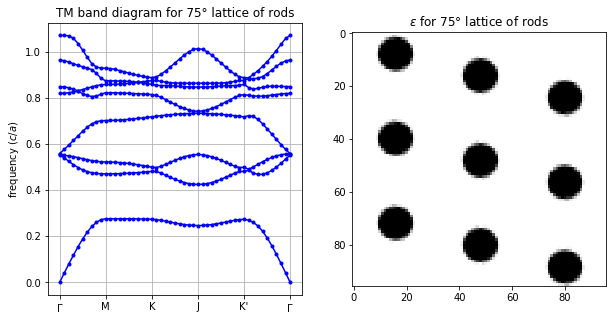

In [14]:
plt.figure(figsize=(10,5))

md = mpb.MPBData(rectify=True, periods=3)
eps = md.convert(ms.get_epsilon())
plt.subplot(1,2,2)
plt.imshow(eps, cmap="binary")
plt.title("$\epsilon$ for 75° lattice of rods")

plt.subplot(1,2,1)
plt.plot(ms.all_freqs, "b.-")
plt.ylabel("frequency ($c/a$)")
plt.xticks([0,10,20,30,40,50], ["$\Gamma$","M","K","J", "K'", "$\Gamma$"])
plt.grid()
plt.title("TM band diagram for 75° lattice of rods")

the gap was:

In [13]:
band1_max = np.max(ms.all_freqs[:,0])
band2_min = np.min(ms.all_freqs[:,1])
gap = 200 * (band2_min - band1_max) / (band1_max + band2_min)
print("TM band gap = %g%%" % gap)

TM band gap = 42.4187%


This is **smaller** than the 47.3988% gap that the sample code computed for the hexagonal lattice.  Breaking the symmetry often (though not always) decreases the gap, because in some directions the gap shrinks even if in other directions the gap increases.

# Problem 3

### Sample code: Square lattice of rods

To start off with, here is some sample code computing the TM band diagram of a square lattice of dielectric rods in air.

In [15]:
ms_sq = mpb.ModeSolver(
        resolution=32,
        num_bands=8,
    
        # a square lattice, period a=1:
        geometry_lattice=mp.Lattice(size=mp.Vector3(1, 1)),
        
        # cylindrical rods with radius 0.2a and epsilon=12
        geometry=[mp.Cylinder(0.2, material=mp.Medium(epsilon=12))],
    
        # the corners of the irreducible Brillouin zone
        k_points = mp.interpolate(9, [
            mp.Vector3(),               # Gamma
            mp.Vector3(0.5, 0),         # X
            mp.Vector3(0.5, 0.5),       # M
            mp.Vector3(),               # Gamma
        ]))
ms_sq.run_tm()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
31 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0

Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 25, 0.3, 0.3, 0, 0.424264, 0.236529, 0.473888, 0.515941, 0.679199, 0.819377, 0.829518, 0.897603, 0.933446
elapsed time for k point: 0.03268790245056152
solve_kpoint (0.25,0.25,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 26, 0.25, 0.25, 0, 0.353553, 0.207854, 0.475659, 0.524638, 0.661782, 0.823707, 0.827826, 0.902302, 0.953873
elapsed time for k point: 0.034895896911621094
solve_kpoint (0.2,0.2,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 27, 0.2, 0.2, 0, 0.282843, 0.172884, 0.482973, 0.533242, 0.640233, 0.819202, 0.838111, 0.910409, 0.976551
elapsed time for k point: 0.032752037048339844
solve_kpoint (0.15,0.15,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 28, 0.15, 0.15, 0, 0.212132, 0.133236, 0.494904, 0.540917, 0.617121, 0.81592, 0.846202, 0.

Plotting the result, similar to above, and computing the gap:

epsilon: 1-12, mean 2.38229, harm. mean 1.1448, 14.5508% > 1, 12.5663% "fill"
TM band gap = 39.0127%, from 0.280948 to 0.417114


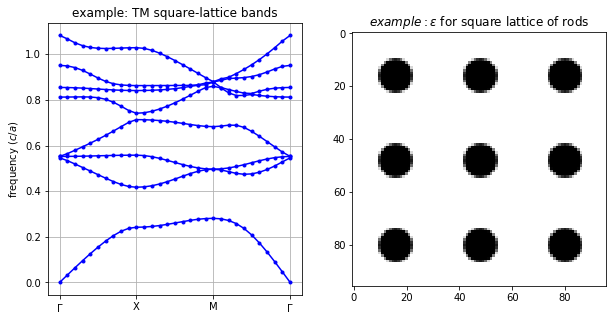

In [24]:
plt.figure(figsize=(10,5))

md = mpb.MPBData(rectify=True, periods=3)
eps = md.convert(ms_sq.get_epsilon())
plt.subplot(1,2,2)
plt.imshow(eps, cmap="binary")
plt.title("$example: \epsilon$ for square lattice of rods")

plt.subplot(1,2,1)
plt.plot(ms_sq.all_freqs, "b.-")
plt.ylabel("frequency ($c/a$)")
plt.xticks([0,10,20,30], ["$\Gamma$","X","M","$\Gamma$"])
plt.grid()
plt.title("example: TM square-lattice bands")

band1_max = np.max(ms_sq.all_freqs[:,0])
band2_min = np.min(ms_sq.all_freqs[:,1])
gap = 200 * (band2_min - band1_max) / (band1_max + band2_min)
print("TM band gap = %g%%, from %g to %g" % (gap, band1_max, band2_min))

It will be useful below to have a list of the frequencies at the $X$ point:

In [29]:
ms_sq.all_freqs[10,:]

array([0.24182099, 0.41711425, 0.55765764, 0.71339515, 0.74131097,
       0.84083049, 0.86251591, 1.02855692])

### part (a): Transmission through $N_x$ rods

The following function computes the transmitted power $P(\omega)$ through a finite (in $x$) crystal consisting of $N_x$ rods, with air on either side, returning an array of frequencies, an array of powers, and the simulation object:

In [17]:
def transmitted_P(Nx=5, pad=4, dpml=1, fmin=0.2, fmax=0.8, nfreq=300):
    fcen = (fmin+fmax)*0.5
    df = fmax - fmin
    sx = Nx + 2*(pad+dpml)
    
    sim = mp.Simulation(cell_size=mp.Vector3(sx, 1),
                        
                        # make Nx duplicates of a rod:
                        geometry = mp.geometric_object_duplicates(mp.Vector3(1,0), 0, Nx-1, 
                                                                  mp.Cylinder(0.2, center=mp.Vector3(-0.5*sx+dpml+pad+0.5,0), material=mp.Medium(epsilon=12))),
 
                        
                        # absorbing boundaries in y direction, periodic in x
                        boundary_layers = [mp.PML(dpml, direction=mp.X)],
                        k_point = mp.Vector3(0,0), # ky=0 for normal incidence
                        
                        # source is a pulsed line source adjacent to PML
                        sources=[mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez,
                                           center=(-sx*0.5 + dpml,0), size=(0,1))],
                        
                        # to speed things up, exploit the y=0 mirror plane:
                        symmetries = [mp.Mirror(mp.Y, phase=1)],
                        resolution=20)
    
    # flux (power) monitor on transmitted side
    fluxregion = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml),
                               size=mp.Vector3(0,1))
    trans = sim.add_flux(fcen, df, nfreq, fluxregion)
    
    # run simulation until fields on transmitted side have decayed away
    sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, mp.Vector3(0.5*sx-dpml), 1e-3))
    return sim, np.array(mp.get_flux_freqs(trans)), np.array(mp.get_fluxes(trans))

### part (a)

We compute the *normalized* transmission spectra for frequencies from $0.2c/a$ to $0.8c/a $as a function of $N_{x}$, for $N_{x}=1,2,3,5,6$, and plot them (together on a single plot). The transmission spectrum is the transmitted power spectrum (shown above) *normalized* by dividing by the transmitted power for $N_{x}=0$ (no holes).

First, we do simulations for these different $N_x$ values and save the powers:

In [19]:
sim,freqs,P0 = transmitted_P(Nx=0)
sim,freqs,P1 = transmitted_P(Nx=1)
sim,freqs,P2 = transmitted_P(Nx=2)
sim,freqs,P3 = transmitted_P(Nx=3)
sim,freqs,P5 = transmitted_P(Nx=5)
sim,freqs,P6 = transmitted_P(Nx=6)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000778913 s
Working in 2D dimensions.
Computational cell is 10 x 1 x 0 with resolution 20
time for set_epsilon = 0.00306416 s
-----------
field decay(t = 50.025000000000006): 0.251526666186021 / 0.251526666186021 = 1.0
field decay(t = 100.05000000000001): 4.2163182609746403e-13 / 0.251526666186021 = 1.676290758712791e-12
run 0 finished at t = 100.05000000000001 (4002 timesteps)
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000457048 s
Working in 2D dimensions.
Computational cell is 11 x 1 x 0 with resolution 20
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.00562501 s
-----------
field decay(t = 50.025000000000006): 0.17101727868531652 / 0.17101727868531652 = 1.0
field decay(t = 100

Then, we plot power vs. frequency, on both a linear and a log scale:

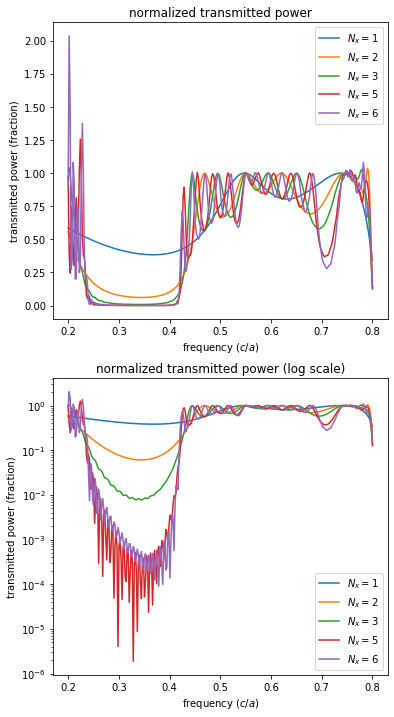

In [22]:
plt.figure(figsize=(6,12))

plt.subplot(2,1,1)
plt.plot(freqs, P1/P0)
plt.plot(freqs, P2/P0)
plt.plot(freqs, P3/P0)
plt.plot(freqs, P5/P0)
plt.plot(freqs, P6/P0)
plt.xlabel("frequency ($c/a$)")
plt.ylabel("transmitted power (fraction)")
plt.title("normalized transmitted power")
plt.legend(["$N_x = 1$", "$N_x = 2$", "$N_x = 3$", "$N_x = 5$", "$N_x = 6$"])

plt.subplot(2,1,2)
plt.semilogy(freqs, P1/P0)
plt.semilogy(freqs, P2/P0)
plt.semilogy(freqs, P3/P0)
plt.semilogy(freqs, P5/P0)
plt.semilogy(freqs, P6/P0)
plt.xlabel("frequency ($c/a$)")
plt.ylabel("transmitted power (fraction)")
plt.title("normalized transmitted power (log scale)")
plt.legend(["$N_x = 1$", "$N_x = 2$", "$N_x = 3$", "$N_x = 5$", "$N_x = 6$"])


In the band diagram, there was a TM gap from a frequency of 0.28 to 0.42 $c/a$. In the transmission spectrum, we clearly see a dip in the transmission—decreasing exponentially with $N_{x}$ as expected (since fields are evanescent in the gap)—around these frequencies. However, if we look closely, we see that the transmission dip is wider than the overall band gap, from about 0.24 to 0.42. What's happening is that our structure is periodic in y, so $k_{y}$ is conserved, and a normal-incident planewave **only couples to $k_{y}=0$ bands**, which are those along the Γ–X portion of the band diagram. If we just look at Γ–X, then the gap is indeed wider, from 0.24 to 0.42 $c/a$!

Also as expected from class, the transmission dip is largest near the middle of the gap, since we showed that the evanescent decay rates increase away from the band edges.

Another feature that you might notice is that, as we increase $N_{x}$, we see that a transmission dip is appearing round 0.71–0.74 $c/a$. If you look closely at the Γ–X band diagram you will see that there is indeed another gap (just for Γ–X, not for the whole Brillouin zone) at those frequencies. Since that gap is much smaller, the evanescent decay rate is much slower, and so the transmission dip is weaker for the same $N_{x}$.

The transmission oscillations in the gap (and near the gap edges) are a form of Fabry–Perot oscillation, which arises from interference in waves reflected from the edges of the crystal (which break periodicity in x and hence allow reflections).

### part (b)

As explained in the solutions, we expect additional diffracted orders show up for $f \ge 1$ in Meep units for this normal-incident planewave.

So, we modify our code to do a CW simulation, running for 200 periods $1/f$ to reach steady state (to a good approximation), and we plot the resulting $E_z$ field for $f = 0.95$ and $f = 1.05$ (just above and below the transition to additional diffracted orders).

In [58]:
def cw_sim(Nx=5, pad=4, dpml=1, f=0.5, T=200):
    sx = Nx + 2*(pad+dpml)
    
    sim = mp.Simulation(cell_size=mp.Vector3(sx, 1),
                        
                        # make Nx duplicates of a rod:
                        geometry = mp.geometric_object_duplicates(mp.Vector3(1,0), 0, Nx-1, 
                                                                  mp.Cylinder(0.2, center=mp.Vector3(-0.5*sx+dpml+pad+0.5,0), material=mp.Medium(epsilon=12))),
 
                        
                        # absorbing boundaries in y direction, periodic in x
                        boundary_layers = [mp.PML(dpml, direction=mp.X)],
                        k_point = mp.Vector3(0,0), # ky=0 for normal incidence
                        
                        # source is a pulsed line source adjacent to PML
                        sources=[mp.Source(mp.ContinuousSource(f, fwidth=0.05), mp.Ez,
                                           center=(-sx*0.5 + dpml,0), size=(0,1))],
                        
                        # to speed things up, exploit the y=0 mirror plane:
                        symmetries = [mp.Mirror(mp.Y, phase=1)],
                        resolution=20)
    
    # run simulation for 200 periods (1/f), which 
    # should roughly be steady state
    sim.run(until=T/f)
    return sim

In [51]:
sim1 = cw_sim(f=0.95)
sim2 = cw_sim(f=1.05)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000828981 s
Working in 2D dimensions.
Computational cell is 15 x 1 x 0 with resolution 20
     cylinder, center = (2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.021354 s
-----------


FloatProgress(value=0.0, description='0% done ', max=210.5263157894737)

run 0 finished at t = 210.55 (8422 timesteps)
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000706911 s
Working in 2D dimensions.
Computational cell is 15 x 1 x 0 with resolution 20
     cylinder, center = (2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.01879

FloatProgress(value=0.0, description='0% done ', max=190.47619047619048)

run 0 finished at t = 190.5 (7620 timesteps)


Plotting the field for $f = 0.95$, we see that the reflected field is clearly a normal-incident planewave, with no additional diffracted orders (except very close to the crystal structure, where we indeed see the exponentially decaying diffracted order!):

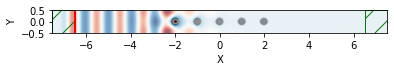

In [52]:
sim1.plot2D(fields=mp.Ez)

Plotting the field for $f = 1.05$, we see that the reflected field clearly has another diffracted order (another Fourier-series component), leading to oscillations in the field pattern from the superposition of the normal-incident and diffracted planewaves:

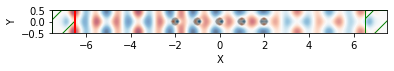

In [53]:
sim2.plot2D(fields=mp.Ez)

Now, let's try a frequency much closer to the $f=1$ threshold:

In [63]:
sim3 = cw_sim(f=0.995, pad=10, T=1000)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000872135 s
Working in 2D dimensions.
Computational cell is 27 x 1 x 0 with resolution 20
     cylinder, center = (2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-1,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-2,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0276408 s
-----------


FloatProgress(value=0.0, description='0% done ', max=1005.0251256281407)

run 0 finished at t = 1005.0500000000001 (40202 timesteps)


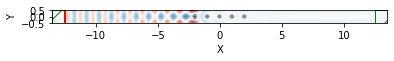

In [64]:
sim3.plot2D(fields=mp.Ez)

In this case, we had to increase the `pad` parameter so that we simulate a larger air region before the crystal in order to see the undisturbed normal-incident wave pattern.   The reason for this is that, as $f \to 1^-$ (from below), the first diffracted order's evanescent decay rate gets slower and slower, so we see its transverse oscillations in the field farther and farther from the crystal.